In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
actions = [
    'come',
    'away',
    'spin'
]

data = np.concatenate([
    np.load('dataset/seq_test1_1673360401.npy'), #각 데이터셋을 불러오고 하나로 합친다.
    np.load('dataset/seq_test2_1673360401.npy'),
    np.load('dataset/seq_test3_1673360401.npy')
], axis=0)

data.shape

(336, 30, 100)

In [3]:
x_data = data[:, :, :-1] #라벨값을 뺀 나머지는 데이터
labels = data[:, 0, -1] #마지막 라벨값을 분리한다.

print(x_data.shape)
print(labels.shape)

(336, 30, 99)
(336,)


In [4]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions)) #one hot encoding 처리
y_data.shape

(336, 3)

In [5]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)
# 9:1 로 트레이닝, 테스트데이터를 분리한다.
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(302, 30, 99) (302, 3)
(34, 30, 99) (34, 3)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])
#모델 정의 , LSTM 64개의 노드와 Dense를 연결한다.
# Dense의 경우 32노드
# 활성화 함수는 softMax , loss는 크로스엔트로피 사용

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                41984     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 44,163
Trainable params: 44,163
Non-trainable params: 0
_________________________________________________________________


2023-01-10 23:23:20.331350: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-10 23:23:20.333500: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/model2.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

#ModelCheckpoint : 모델저장 (models/model.h5경로로 저장하겠다) , ReduceLROnPlateau : 학습률 조절

Train on 302 samples, validate on 34 samples
Epoch 1/200
288/302 [===========================>..] - ETA: 0s - loss: 7.8090 - acc: 0.4479
Epoch 00001: val_acc improved from -inf to 0.47059, saving model to models/model2.h5
302/302 [==============================] - 4s 12ms/sample - loss: 7.5746 - acc: 0.4404 - val_loss: 4.2438 - val_acc: 0.4706
Epoch 2/200
288/302 [===========================>..] - ETA: 0s - loss: 3.1101 - acc: 0.5451
Epoch 00002: val_acc did not improve from 0.47059
302/302 [==============================] - 2s 7ms/sample - loss: 3.1350 - acc: 0.5430 - val_loss: 3.6305 - val_acc: 0.4118
Epoch 3/200
288/302 [===========================>..] - ETA: 0s - loss: 3.3020 - acc: 0.5938
Epoch 00003: val_acc improved from 0.47059 to 0.50000, saving model to models/model2.h5
302/302 [==============================] - 2s 7ms/sample - loss: 3.4830 - acc: 0.5861 - val_loss: 5.4074 - val_acc: 0.5000
Epoch 4/200
288/302 [===========================>..] - ETA: 0s - loss: 2.9025 - acc: 0

Epoch 31/200
288/302 [===========================>..] - ETA: 0s - loss: 0.0048 - acc: 1.0000
Epoch 00031: val_acc did not improve from 0.94118
302/302 [==============================] - 1s 5ms/sample - loss: 0.0046 - acc: 1.0000 - val_loss: 0.1614 - val_acc: 0.9118
Epoch 32/200
288/302 [===========================>..] - ETA: 0s - loss: 0.0041 - acc: 1.0000
Epoch 00032: val_acc did not improve from 0.94118
302/302 [==============================] - 1s 4ms/sample - loss: 0.0041 - acc: 1.0000 - val_loss: 0.1667 - val_acc: 0.9118
Epoch 33/200
288/302 [===========================>..] - ETA: 0s - loss: 0.0039 - acc: 1.0000
Epoch 00033: val_acc did not improve from 0.94118
302/302 [==============================] - 1s 4ms/sample - loss: 0.0038 - acc: 1.0000 - val_loss: 0.1705 - val_acc: 0.9118
Epoch 34/200
288/302 [===========================>..] - ETA: 0s - loss: 0.0035 - acc: 1.0000
Epoch 00034: val_acc did not improve from 0.94118
302/302 [==============================] - 2s 5ms/sample - 

Epoch 62/200
288/302 [===========================>..] - ETA: 0s - loss: 0.0044 - acc: 1.0000
Epoch 00062: val_acc did not improve from 1.00000
302/302 [==============================] - 2s 7ms/sample - loss: 0.0043 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 1.0000
Epoch 63/200
288/302 [===========================>..] - ETA: 0s - loss: 0.0041 - acc: 1.0000
Epoch 00063: val_acc did not improve from 1.00000
302/302 [==============================] - 2s 7ms/sample - loss: 0.0039 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 1.0000
Epoch 64/200
288/302 [===========================>..] - ETA: 0s - loss: 0.0037 - acc: 1.0000
Epoch 00064: val_acc did not improve from 1.00000
302/302 [==============================] - 2s 6ms/sample - loss: 0.0036 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 1.0000
Epoch 65/200
288/302 [===========================>..] - ETA: 0s - loss: 0.0035 - acc: 1.0000
Epoch 00065: val_acc did not improve from 1.00000
302/302 [==============================] - 2s 7ms/sample - 

Epoch 93/200
288/302 [===========================>..] - ETA: 0s - loss: 9.9572e-04 - acc: 1.0000
Epoch 00093: val_acc did not improve from 1.00000
302/302 [==============================] - 2s 6ms/sample - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0043 - val_acc: 1.0000
Epoch 94/200
288/302 [===========================>..] - ETA: 0s - loss: 9.2104e-04 - acc: 1.0000
Epoch 00094: val_acc did not improve from 1.00000
302/302 [==============================] - 2s 7ms/sample - loss: 9.6216e-04 - acc: 1.0000 - val_loss: 0.0043 - val_acc: 1.0000
Epoch 95/200
288/302 [===========================>..] - ETA: 0s - loss: 9.3221e-04 - acc: 1.0000
Epoch 00095: val_acc did not improve from 1.00000
302/302 [==============================] - 2s 6ms/sample - loss: 9.3005e-04 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000
Epoch 96/200
288/302 [===========================>..] - ETA: 0s - loss: 8.4341e-04 - acc: 1.0000
Epoch 00096: val_acc did not improve from 1.00000
302/302 [==========================

Epoch 123/200
288/302 [===========================>..] - ETA: 0s - loss: 3.5735e-04 - acc: 1.0000
Epoch 00123: val_acc did not improve from 1.00000
302/302 [==============================] - 2s 5ms/sample - loss: 3.7014e-04 - acc: 1.0000 - val_loss: 0.0040 - val_acc: 1.0000
Epoch 124/200
288/302 [===========================>..] - ETA: 0s - loss: 3.5064e-04 - acc: 1.0000
Epoch 00124: val_acc did not improve from 1.00000
302/302 [==============================] - 2s 5ms/sample - loss: 3.5385e-04 - acc: 1.0000 - val_loss: 0.0041 - val_acc: 1.0000
Epoch 125/200
288/302 [===========================>..] - ETA: 0s - loss: 3.5048e-04 - acc: 1.0000
Epoch 00125: val_acc did not improve from 1.00000
302/302 [==============================] - 1s 5ms/sample - loss: 3.3634e-04 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000
Epoch 126/200
288/302 [===========================>..] - ETA: 0s - loss: 3.4775e-04 - acc: 1.0000
Epoch 00126: val_acc did not improve from 1.00000
302/302 [==================

Epoch 153/200
288/302 [===========================>..] - ETA: 0s - loss: 5.6416e-04 - acc: 1.0000
Epoch 00153: val_acc did not improve from 1.00000
302/302 [==============================] - 1s 4ms/sample - loss: 5.7333e-04 - acc: 1.0000 - val_loss: 0.0044 - val_acc: 1.0000
Epoch 154/200
288/302 [===========================>..] - ETA: 0s - loss: 5.7605e-04 - acc: 1.0000
Epoch 00154: val_acc did not improve from 1.00000
302/302 [==============================] - 1s 4ms/sample - loss: 5.6461e-04 - acc: 1.0000 - val_loss: 0.0044 - val_acc: 1.0000
Epoch 155/200
288/302 [===========================>..] - ETA: 0s - loss: 5.7769e-04 - acc: 1.0000
Epoch 00155: val_acc did not improve from 1.00000
302/302 [==============================] - 1s 4ms/sample - loss: 5.5906e-04 - acc: 1.0000 - val_loss: 0.0044 - val_acc: 1.0000
Epoch 156/200
288/302 [===========================>..] - ETA: 0s - loss: 5.4455e-04 - acc: 1.0000
Epoch 00156: val_acc did not improve from 1.00000
302/302 [==================

Epoch 183/200
288/302 [===========================>..] - ETA: 0s - loss: 4.4841e-04 - acc: 1.0000
Epoch 00183: val_acc did not improve from 1.00000
302/302 [==============================] - 2s 7ms/sample - loss: 4.3418e-04 - acc: 1.0000 - val_loss: 0.0039 - val_acc: 1.0000
Epoch 184/200
288/302 [===========================>..] - ETA: 0s - loss: 4.2074e-04 - acc: 1.0000
Epoch 00184: val_acc did not improve from 1.00000
302/302 [==============================] - 1s 5ms/sample - loss: 4.3054e-04 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000
Epoch 185/200
288/302 [===========================>..] - ETA: 0s - loss: 4.2522e-04 - acc: 1.0000
Epoch 00185: val_acc did not improve from 1.00000
302/302 [==============================] - 1s 5ms/sample - loss: 4.2660e-04 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000
Epoch 186/200
288/302 [===========================>..] - ETA: 0s - loss: 4.4044e-04 - acc: 1.0000
Epoch 00186: val_acc did not improve from 1.00000
302/302 [==================

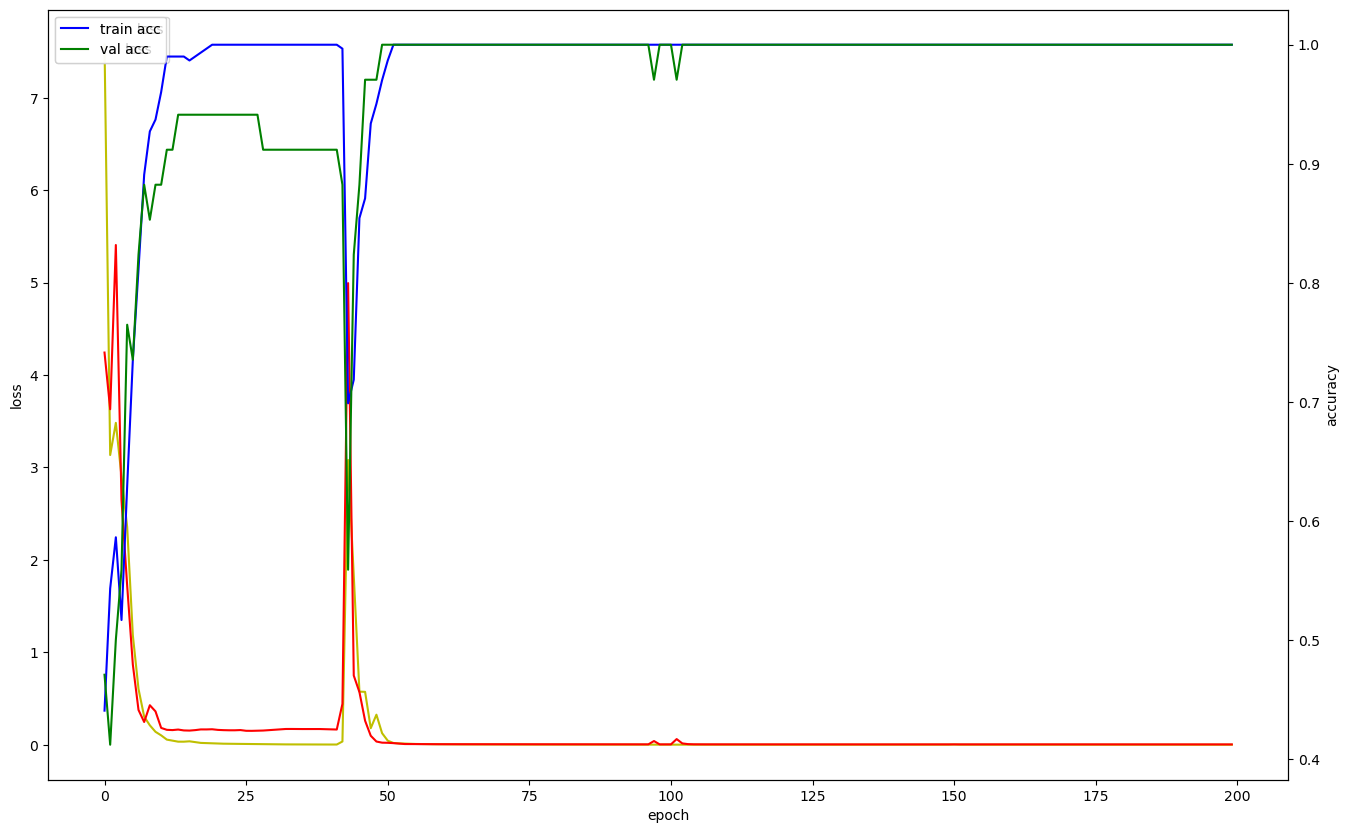

In [10]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [12]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model2.h5')
#모델을 불러온다.
y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[24,  0],
        [ 0, 10]],

       [[24,  0],
        [ 0, 10]],

       [[20,  0],
        [ 0, 14]]])